In [2]:
import pandas as pd
import re
from nltk.sentiment import SentimentIntensityAnalyzer

In [37]:
all_posts = pd.read_csv("redditposts_full.csv")
all_posts.drop(columns= "Unnamed: 0", inplace=True)

In [98]:
company_keywords = {
    'AEVA': ['aeva', 'aeva technologies'],
    'ATRO': ['astronics', 'atro'],
    'DRD': ['drd', 'drdgold'],
    'GRPN': ['groupon', 'grpn'],
    'NGVC': ['natural grocers', 'vitamin cottage', 'ngvc'],
    'RDFN': ['redfin', 'rdfn'],
    'ROOT': ['root insurance', 'root inc', 'root'],
    'TDUP': ['thredup', 'tdup']
}

sector_keywords = {
    'technology': ['technology', 'tech'],
    'industrials': ['industrial', 'industrials'],
    'materials': ['materials', 'mining', 'metals'],
    'communication services': ['communication', 'media', 'telecom'],
    'consumer defensive': ['consumer defensive', 'grocers', 'supermarket'],
    'real estate': ['real estate', 'housing', 'property'],
    'financial services': ['financial', 'insurance', 'bank'],
    'consumer cyclical': ['retail', 'ecommerce', 'fashion', 'consumer cyclical']
}

def generate_flexible_mentions(df, company_terms, sector_terms):
    df = df.copy()
    df['Text'] = df['Text'].astype(str).str.lower()
    
    # Company mentions
    for ticker, keywords in company_terms.items():
        pattern = '|'.join([re.escape(term) for term in keywords])
        df[f'mention_{ticker}'] = df['Text'].str.contains(pattern, regex=True).astype(int)

    # Sector mentions
    for sector, keywords in sector_terms.items():
        col_name = sector.replace(' ', '_').lower()
        pattern = '|'.join([re.escape(term) for term in keywords])
        df[f'mention_{col_name}'] = df['Text'].str.contains(pattern, regex=True).astype(int)
    return df

posts_df = generate_flexible_mentions(all_posts, company_keywords, sector_keywords)



In [99]:
posts_df

,Text,Score,Upvote Ratio,Total Comments,Date,mention_AEVA,mention_ATRO,mention_DRD,mention_GRPN,mention_NGVC,...,mention_ROOT,mention_TDUP,mention_technology,mention_industrials,mention_materials,mention_communication_services,mention_consumer_defensive,mention_real_estate,mention_financial_services,mention_consumer_cyclical
0,daily general discussion and advice thread - j...,14.0,0.81,101,2022-01-01 10:01:18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,where to invest in a bubble... real estate may...,281.0,0.75,384,2022-01-01 13:05:45,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,what are your thoughts on the energy sector in...,269.0,0.88,263,2022-01-01 14:43:03,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,"world's largest free trade agreement, rcep, ki...",262.0,0.93,101,2022-01-01 17:37:55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,doubt regarding leveraged etf calculation supp...,0.0,0.40,36,2022-01-01 18:34:33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92233,good platforms for investing in military arms ...,1.0,0.50,1,2024-12-31 19:13:50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92234,22 year old looking for investing advice. hey ...,2.0,1.00,3,2024-12-31 19:27:59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92235,investment for beginners hey guys! happy new ...,6.0,0.86,6,2024-12-31 20:16:35,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
92236,dollar-cost averaging vs all at once . i want ...,10.0,0.92,18,2024-12-31 20:52:02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
mention_sums = posts_df.drop(columns=['Date', 'Text', "Score", "Upvote Ratio", "Total Comments"], errors='ignore').sum()
mention_sums = mention_sums.sort_values(ascending=False)

print(mention_sums)


mention_financial_services        15794
mention_technology                10732
mention_communication_services     4357
mention_real_estate                3311
mention_materials                  2657
mention_consumer_cyclical          2557
mention_industrials                1120
mention_ROOT                        170
mention_consumer_defensive           88
mention_ATRO                         71
mention_RDFN                         31
mention_GRPN                         13
mention_TDUP                         10
mention_DRD                           7
mention_NGVC                          2
mention_AEVA                          1
dtype: int64


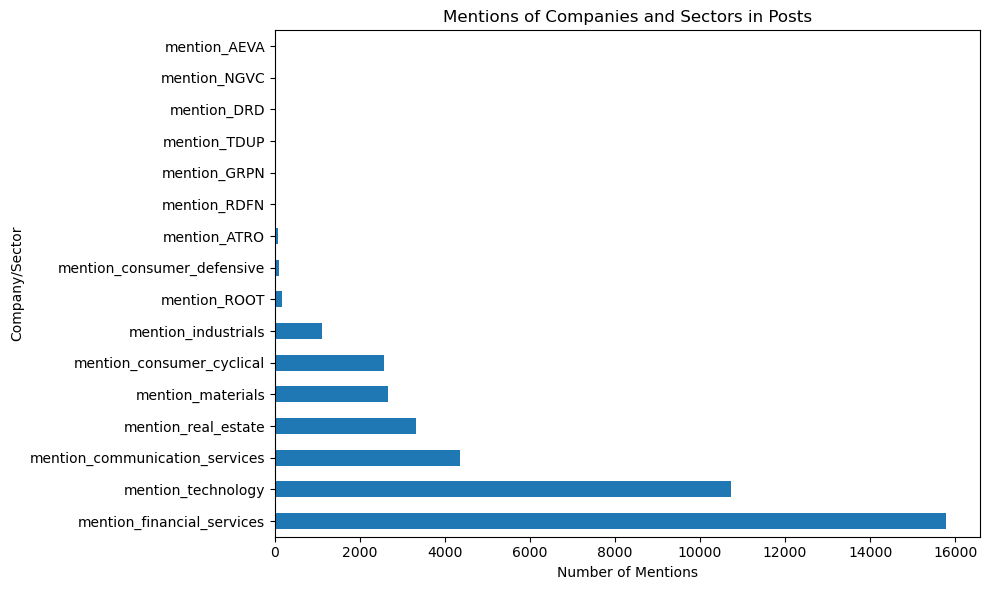

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
mention_sums.plot(kind='barh')
plt.title('Mentions of Companies and Sectors in Posts')
plt.xlabel('Number of Mentions')
plt.ylabel('Company/Sector')
plt.tight_layout()
plt.savefig("metion_times.png")
plt.show()

In [102]:
df = posts_df.copy()

In [103]:
df.Date = pd.to_datetime(df.Date).dt.date

In [50]:
df= df.set_index("Date")

In [104]:
mention_columns = [col for col in df.columns if col.startswith('mention_')]
daily_mentions = df.groupby('Date')[mention_columns].sum()
daily_mentions_freq = daily_mentions[mention_columns]/(df.groupby('Date').size()[1])

In [105]:
daily_mentions_freq

,mention_AEVA,mention_ATRO,mention_DRD,mention_GRPN,mention_NGVC,mention_RDFN,mention_ROOT,mention_TDUP,mention_technology,mention_industrials,mention_materials,mention_communication_services,mention_consumer_defensive,mention_real_estate,mention_financial_services,mention_consumer_cyclical
Date,,,,,,,,,,,,,,,,
2022-01-01,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.161290,0.016129,0.032258,0.032258,0.000000,0.032258,0.161290,0.032258
2022-01-02,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.177419,0.000000,0.000000,0.048387,0.000000,0.048387,0.177419,0.096774
2022-01-03,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.161290,0.048387,0.016129,0.080645,0.000000,0.064516,0.209677,0.032258
2022-01-04,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.241935,0.016129,0.096774,0.032258,0.000000,0.064516,0.225806,0.064516
2022-01-05,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.322581,0.080645,0.161290,0.080645,0.000000,0.080645,0.225806,0.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,0.0,0.000000,0.0,0.0,0.000000,0.0,0.016129,0.0,0.370968,0.032258,0.080645,0.129032,0.000000,0.080645,0.500000,0.064516
2024-12-28,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.145161,0.016129,0.032258,0.080645,0.000000,0.096774,0.241935,0.000000
2024-12-29,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.129032,0.032258,0.064516,0.032258,0.000000,0.064516,0.258065,0.064516


In [106]:
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['Text'].fillna('').apply(lambda x: sia.polarity_scores(x)['compound'])
df["Total Comments"] = pd.to_numeric(df["Total Comments"], errors='coerce')
df['weighted_sentiment'] = df['Score'] * df['sentiment']
eps = 1e-6
# --- 1. Base daily aggregation ---
daily_features = df.groupby('Date').agg(
    n_posts=('Text', 'count'),
    total_score=('Score', 'sum'),
    avg_score=('Score', 'mean'),
    total_comments=('Total Comments', 'sum'),
    avg_comments=('Total Comments', 'mean'),
    avg_upvote_ratio=('Upvote Ratio', 'mean'),
    std_upvote_ratio=('Upvote Ratio', 'std'),
    weighted_sentiment_sum=('weighted_sentiment', 'sum'),
    weighted_sentiment_denom=('Score', 'sum')
)

daily_features['weighted_sentiment'] = (
    daily_features['weighted_sentiment_sum'] /
    (daily_features['weighted_sentiment_denom'] + eps)
)

daily_features.drop(columns=['weighted_sentiment_sum', 'weighted_sentiment_denom'], inplace=True)

In [107]:
daily_features = pd.concat([daily_features, daily_mentions_freq], axis = 1)

In [108]:
# === 2. Daily weighted sentiment per keyword ===
mention_columns = [col for col in df.columns if col.startswith('mention_')]

keyword_daily_sentiment = []

for col in mention_columns:
    # Filter posts where this keyword is mentioned
    keyword_df = df[df[col] == 1]

    if not keyword_df.empty:
        # Group by date and calculate weighted sentiment
        temp = keyword_df.groupby('Date').apply(
            lambda g: (g['Score'] * g['sentiment']).sum() / (g['Score'].sum() + eps)
        )
        temp = temp.to_frame(name=f'{col}_sentiment')
        keyword_daily_sentiment.append(temp)

# Combine all keyword-specific sentiment into one DataFrame
if keyword_daily_sentiment:
    keyword_sentiment_df = pd.concat(keyword_daily_sentiment, axis=1)
    final_daily_df = daily_features.merge(keyword_sentiment_df, left_index=True, right_index=True, how='left')
else:
    final_daily_df = daily_features.copy()

In [109]:
final_daily_df.rename(columns={col: col.replace('mention_', '') for col in final_daily_df.columns if col.startswith('mention_')}, inplace=True)

In [110]:
final_daily_df

,n_posts,total_score,avg_score,total_comments,avg_comments,avg_upvote_ratio,std_upvote_ratio,weighted_sentiment,AEVA,ATRO,...,ROOT_sentiment,TDUP_sentiment,technology_sentiment,industrials_sentiment,materials_sentiment,communication_services_sentiment,consumer_defensive_sentiment,real_estate_sentiment,financial_services_sentiment,consumer_cyclical_sentiment
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,45,6826.0,151.688889,5276.0,117.244444,0.784000,0.142181,0.152546,0.0,0.000000,...,NaN,NaN,0.707021,1.000000,0.977794,1.000000,NaN,0.599334,-0.561267,0.728058
2022-01-02,62,20694.0,333.774194,7896.0,127.354839,0.726452,0.201642,0.635591,0.0,0.000000,...,NaN,NaN,0.952006,NaN,NaN,0.222913,NaN,0.998200,0.967159,0.992347
2022-01-03,80,8157.0,101.962500,4635.0,57.937500,0.748875,0.183772,0.714703,0.0,0.000000,...,NaN,NaN,0.974607,0.370733,0.999000,0.985527,NaN,0.897439,0.918701,0.994086
2022-01-04,107,6301.0,58.887850,6044.0,56.485981,0.754019,0.187706,0.238024,0.0,0.000000,...,NaN,NaN,-0.049327,-0.563499,0.554175,0.909100,NaN,0.326909,0.774007,-0.787756
2022-01-05,103,6813.0,66.145631,6585.0,63.932039,0.772233,0.196284,0.764712,0.0,0.000000,...,NaN,NaN,0.846039,0.906037,0.792390,0.982550,NaN,0.974774,0.946424,0.889311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,185,2436.0,13.167568,3718.0,20.097297,0.755730,0.248061,0.541538,0.0,0.000000,...,0.972899,NaN,0.800469,0.977894,0.929237,0.852270,NaN,0.632821,0.929765,0.920925
2024-12-28,117,1456.0,12.444444,2377.0,20.316239,0.724359,0.254217,0.474523,0.0,0.000000,...,NaN,NaN,0.898662,0.997500,0.958848,0.975339,NaN,0.870725,0.867740,NaN
2024-12-29,113,1377.0,12.185841,2177.0,19.265487,0.701504,0.247344,0.482169,0.0,0.000000,...,NaN,NaN,0.890564,0.575011,0.939600,0.931909,NaN,0.935189,0.689354,-0.260995


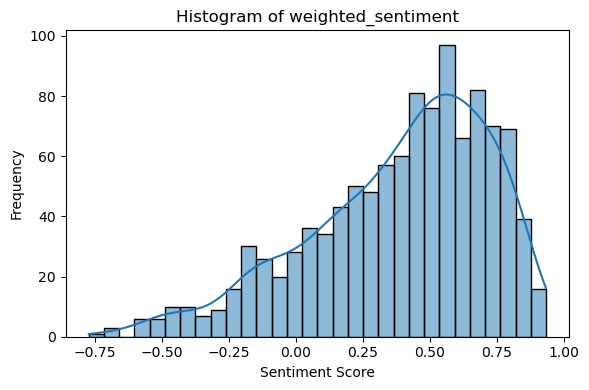

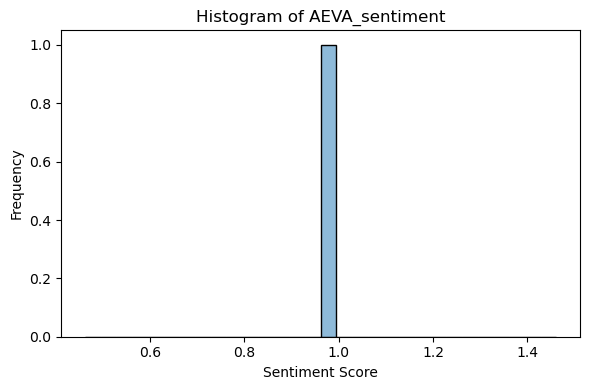

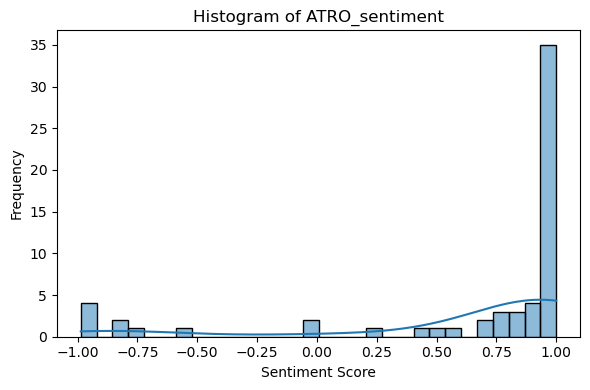

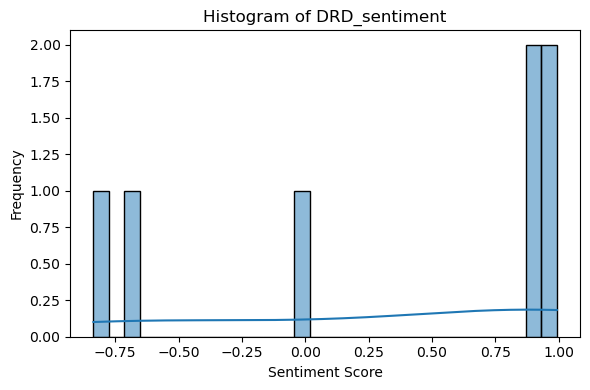

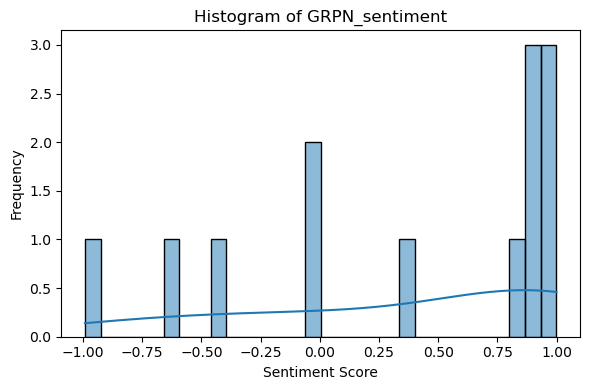

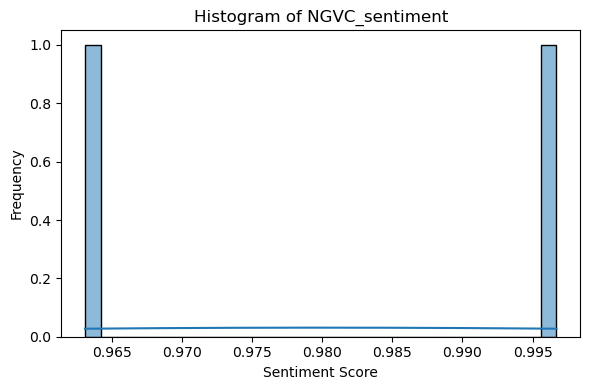

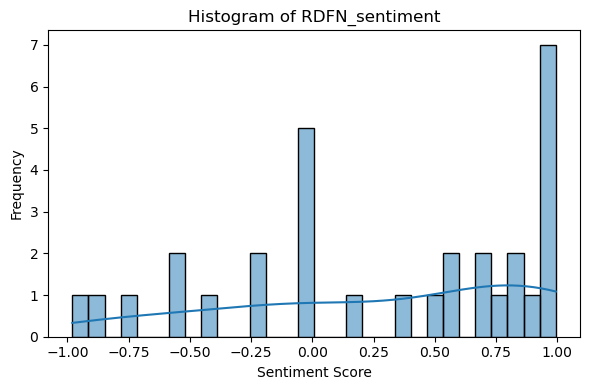

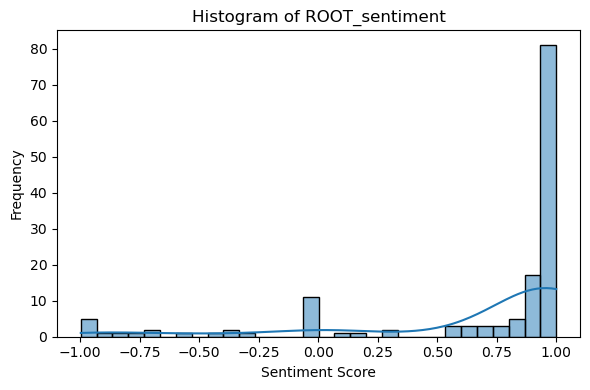

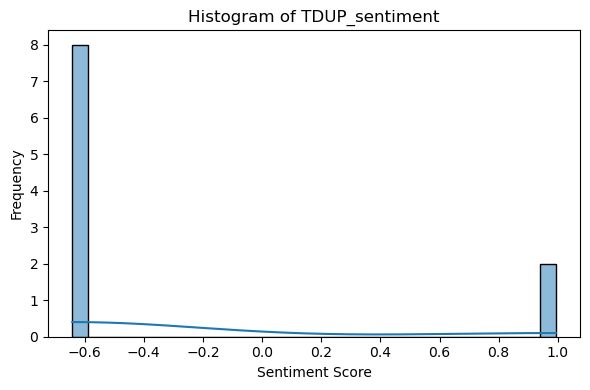

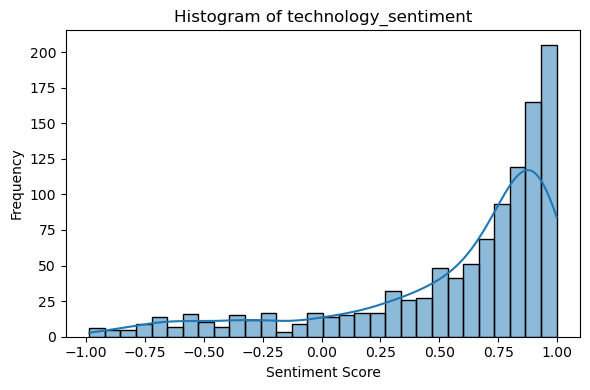

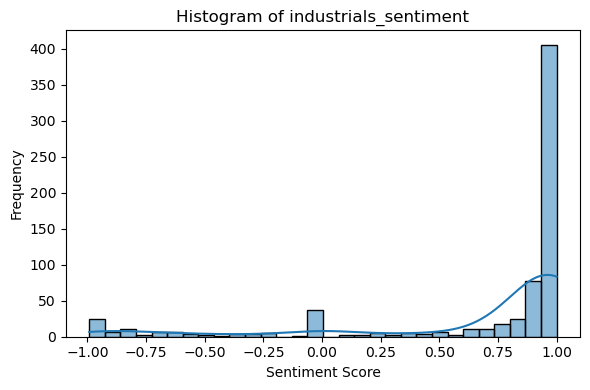

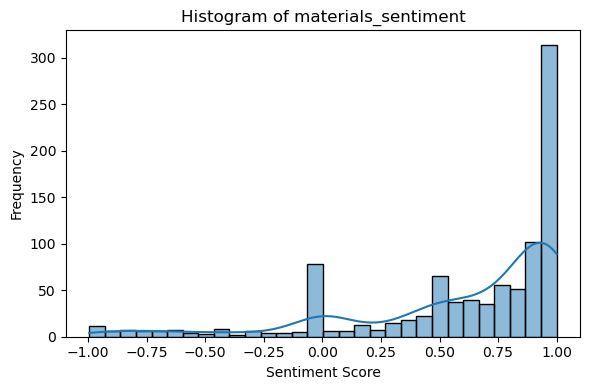

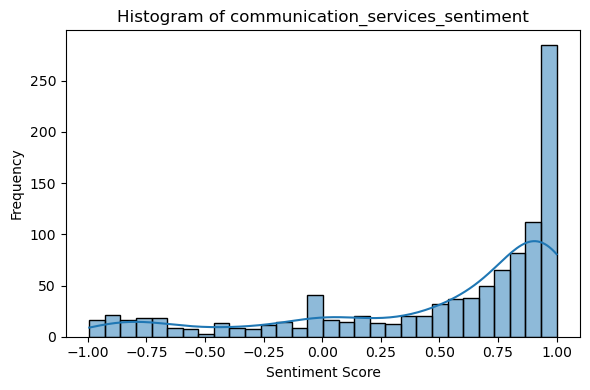

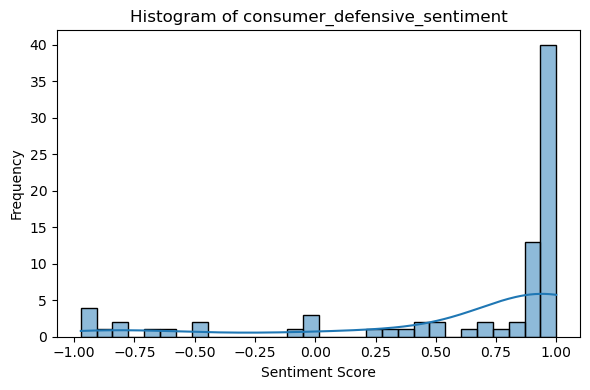

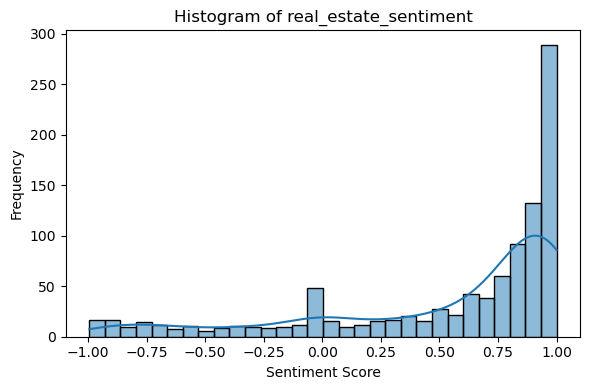

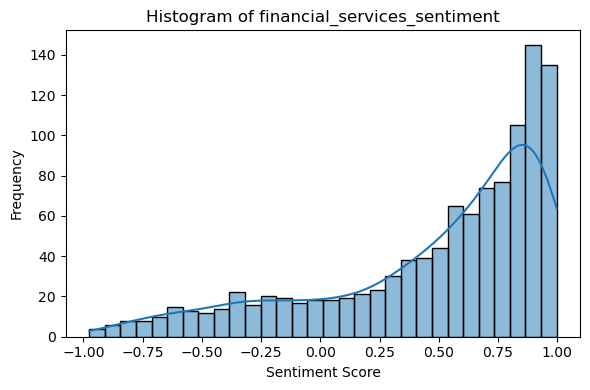

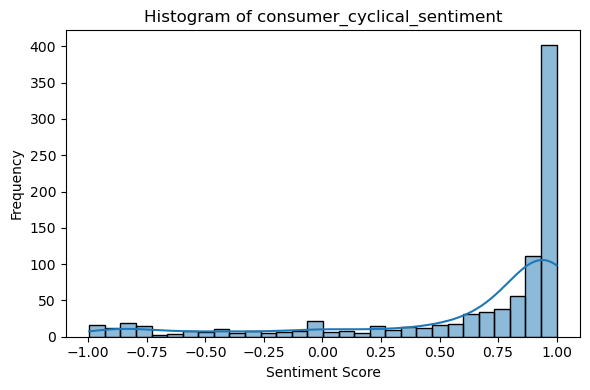

In [139]:
import seaborn as sns
sentiment_columns = [col for col in final_daily_df.columns if col.endswith('_sentiment')]

# Plot histogram for each sentiment column
for col in sentiment_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(final_daily_df[col].dropna(), bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'{col}.png', dpi=300, bbox_inches='tight')
    plt.show()


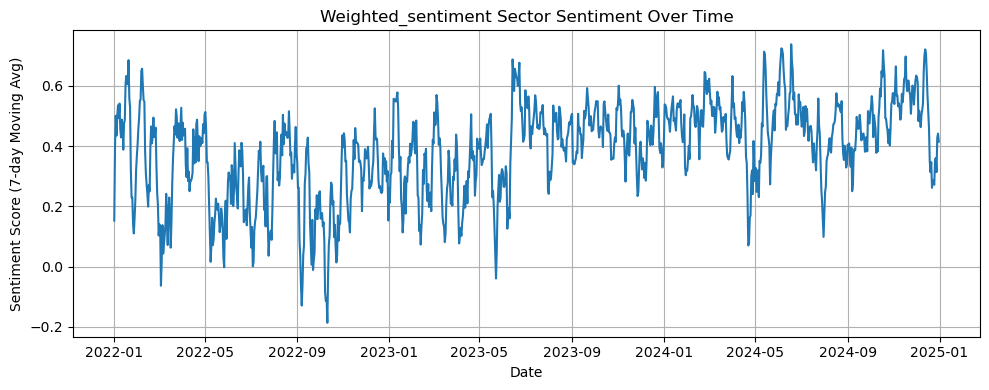

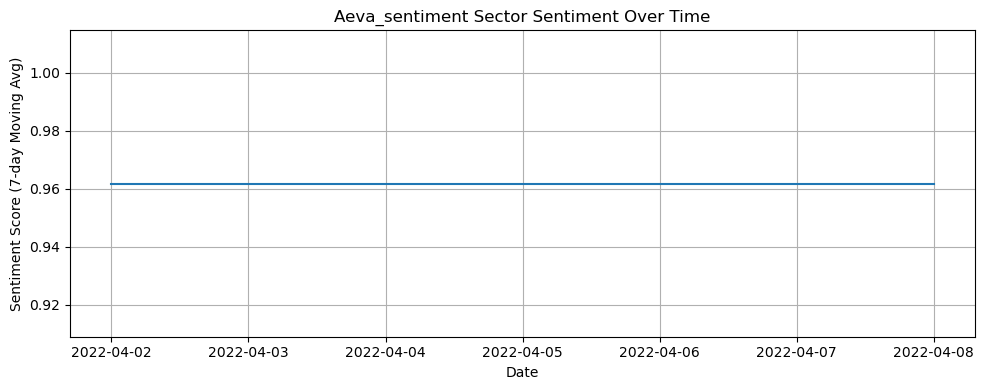

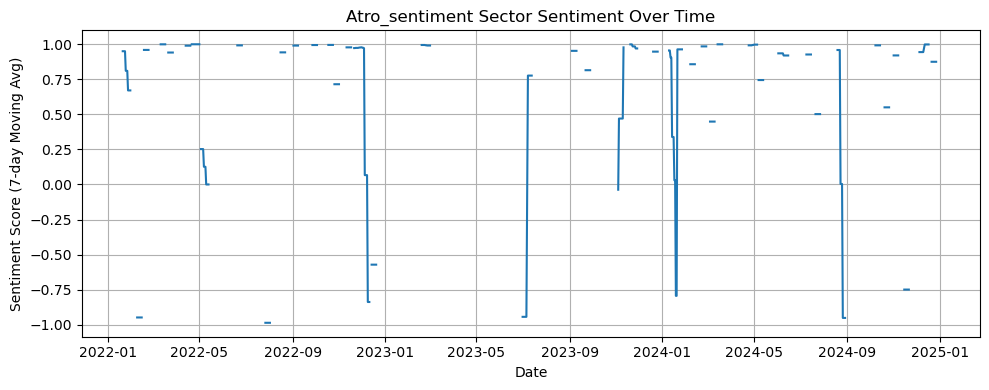

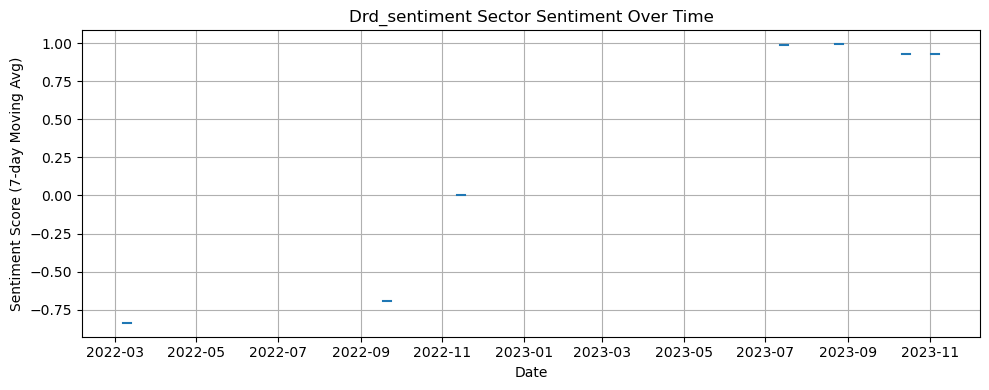

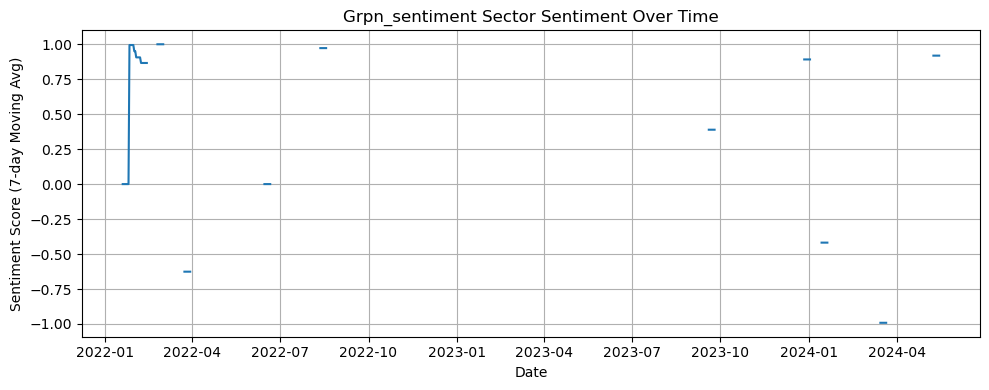

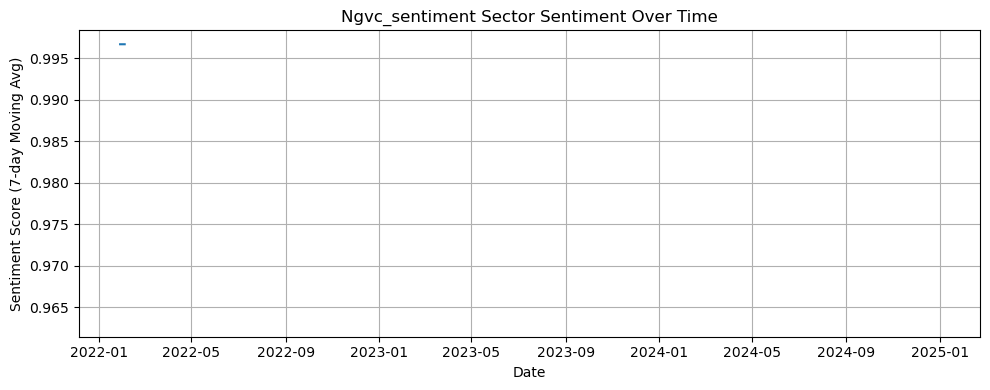

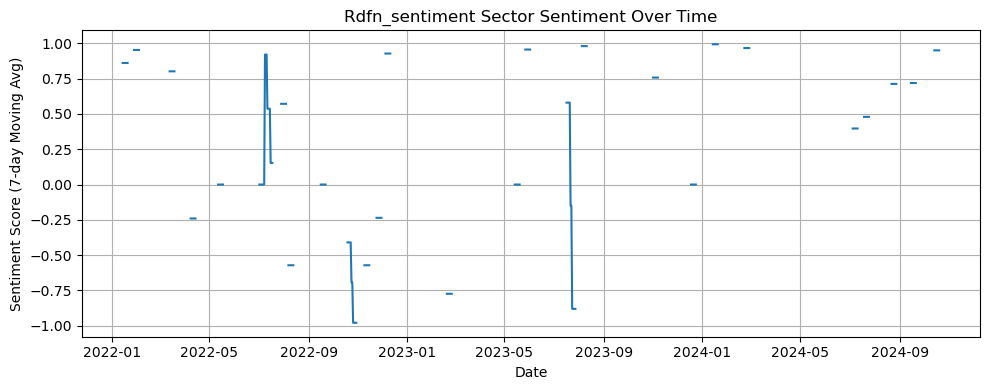

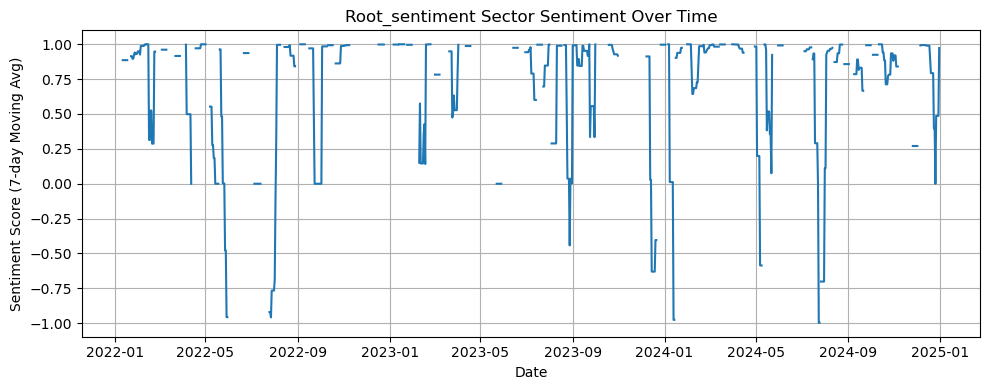

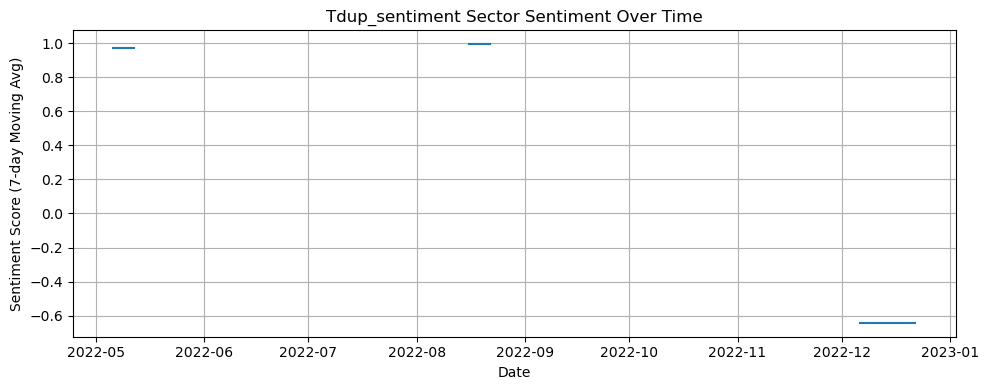

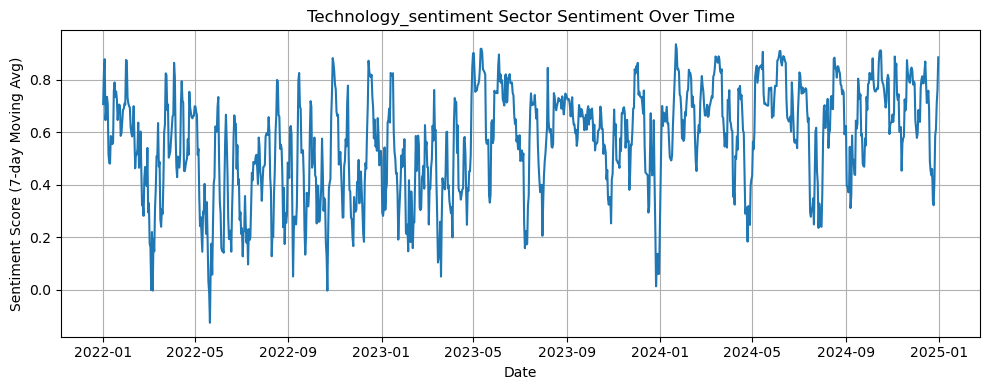

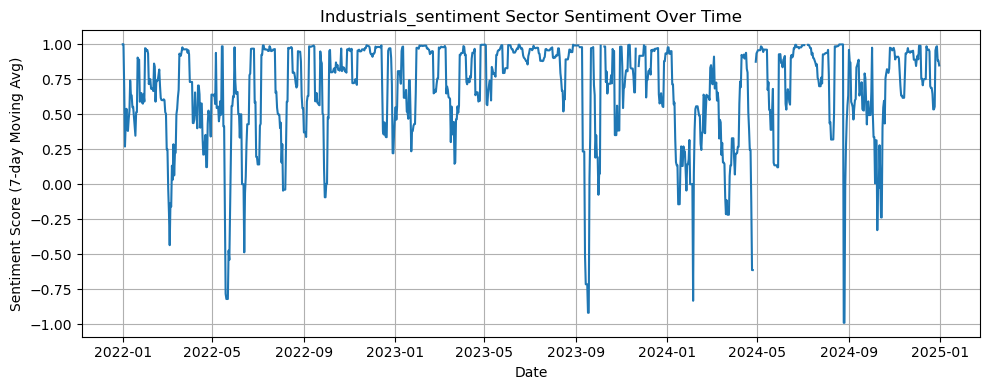

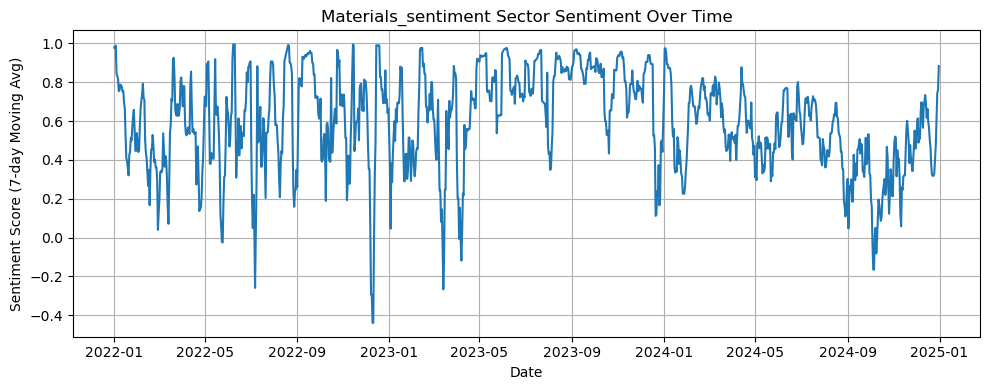

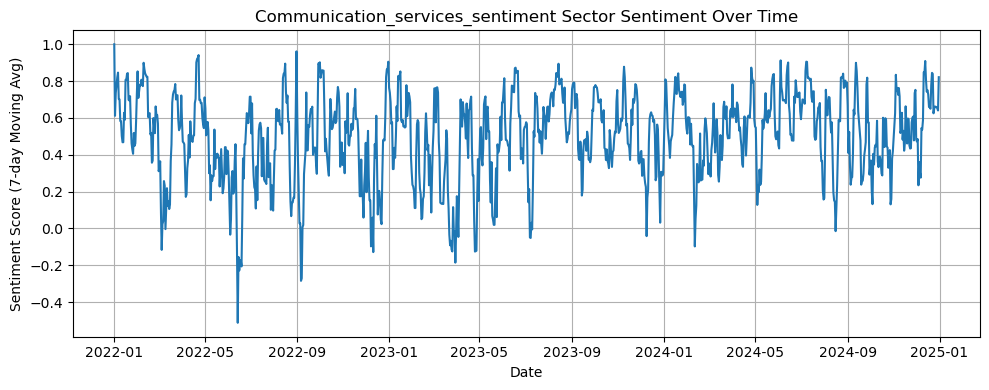

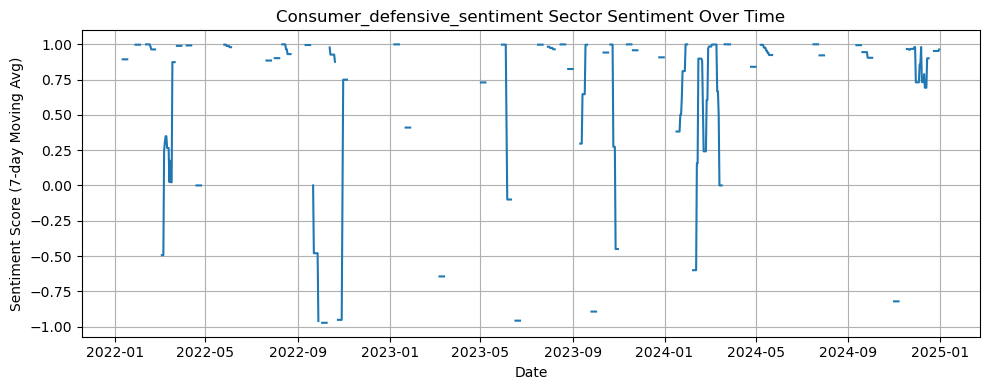

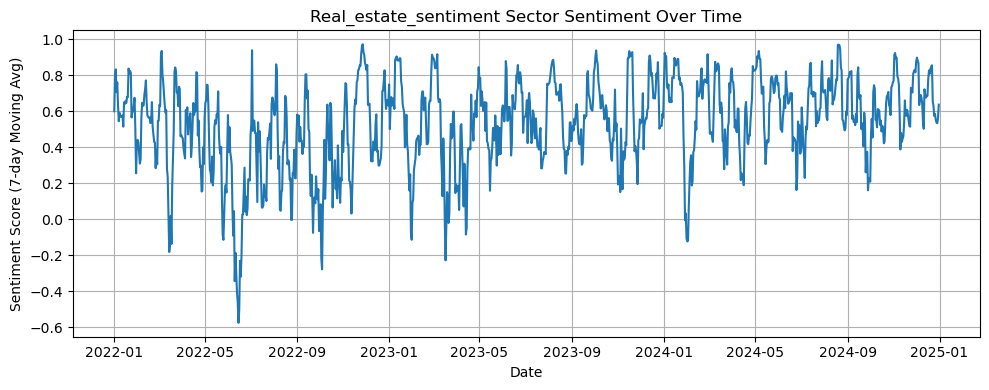

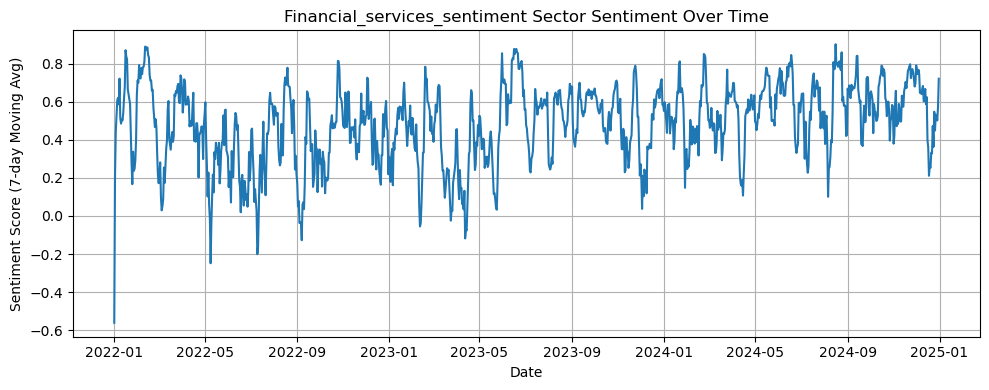

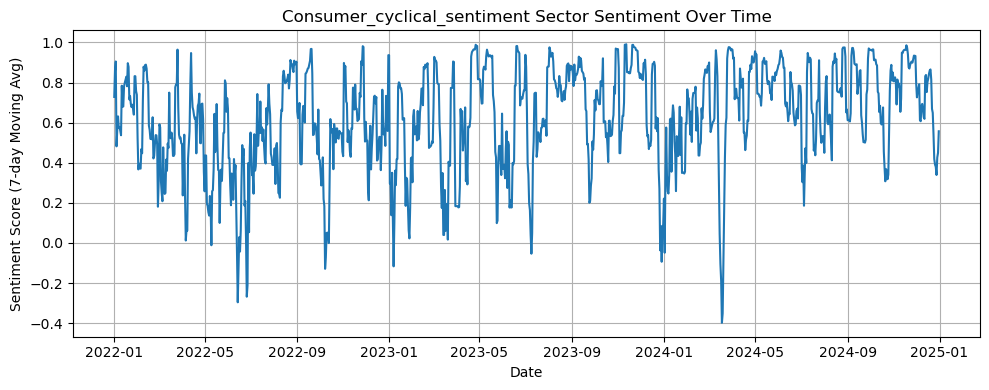

In [117]:
sentiment_columns = [col for col in final_daily_df.columns if col.endswith('_sentiment')]

for col in sentiment_columns:
    plt.figure(figsize=(10, 4))
    final_daily_df[col].rolling(window=7, min_periods=1).mean().plot()
    plt.title(f'{col.replace("sentiment_", "").capitalize()} Sector Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score (7-day Moving Avg)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [134]:

def categorize_sentiment(score):
    if pd.isna(score):
        return None
    elif score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'



In [131]:
for col in sentiment.columns:
    sentiment[col] = sentiment[col].apply(categorize_sentiment)

/var/folders/w_/wzxdnvq13mxbxkhjgg1mty_80000gn/T/ipykernel_79928/3507866522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment[col] = sentiment[col].apply(categorize_sentiment)
/var/folders/w_/wzxdnvq13mxbxkhjgg1mty_80000gn/T/ipykernel_79928/3507866522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment[col] = sentiment[col].apply(categorize_sentiment)
/var/folders/w_/wzxdnvq13mxbxkhjgg1mty_80000gn/T/ipykernel_79928/3507866522.py:2: SettingWithCopyWarning: 
A value is trying to be set o

In [137]:
sentiment_catogorized

,weighted_sentiment,AEVA_sentiment,ATRO_sentiment,DRD_sentiment,GRPN_sentiment,NGVC_sentiment,RDFN_sentiment,ROOT_sentiment,TDUP_sentiment,technology_sentiment,industrials_sentiment,materials_sentiment,communication_services_sentiment,consumer_defensive_sentiment,real_estate_sentiment,financial_services_sentiment,consumer_cyclical_sentiment
Date,,,,,,,,,,,,,,,,,
2022-01-01,positive,None,None,None,None,None,None,None,None,positive,positive,positive,positive,None,positive,negative,positive
2022-01-02,positive,None,None,None,None,None,None,None,None,positive,None,None,positive,None,positive,positive,positive
2022-01-03,positive,None,None,None,None,None,None,None,None,positive,positive,positive,positive,None,positive,positive,positive
2022-01-04,positive,None,None,None,None,None,None,None,None,neutral,negative,positive,positive,None,positive,positive,negative
2022-01-05,positive,None,None,None,None,None,None,None,None,positive,positive,positive,positive,None,positive,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,positive,None,None,None,None,None,None,positive,None,positive,positive,positive,positive,None,positive,positive,positive
2024-12-28,positive,None,None,None,None,None,None,None,None,positive,positive,positive,positive,None,positive,positive,None
2024-12-29,positive,None,None,None,None,None,None,None,None,positive,positive,positive,positive,None,positive,positive,negative


In [143]:
sentiment_catogorized.to_csv("catogorized_sentiment.csv")

In [142]:
final_daily_df.to_csv("all_features.csv")